<a href="https://colab.research.google.com/github/harish-03-11/Bank-churn-customers-with-sampling/blob/main/Har_Bank_Customer_Churn_with_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given: Bank customers dataset


Building a classifier which can determine whether they will leave in the next 6 months or not

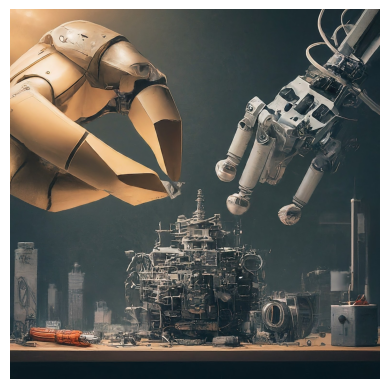

In [573]:
# Step 1: Load and display the image using OpenCV and Matplotlib
import cv2
from matplotlib import pyplot as plt

# Path to your image file
image_path = '/content/sample_data/Images_gemini/Gemini_Generated_Image_f3x8dff3x8dff3x8.jpeg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert the image from BGR (OpenCV default) to RGB (Matplotlib default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes for better visualization
plt.show()



In [574]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [575]:
df = pd.read_csv("/content/sample_data/archive.zip")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [576]:
#checking what are the unique values
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [577]:
print_unique_col_values(df)

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [578]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [579]:
df.replace({'Female': 1, "Male": 0},inplace=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [580]:
df.drop(["CustomerId","RowNumber",'Surname','Geography'], axis = 1,inplace=True)

In [581]:
df1 = df

Text(0.5, 1.0, 'Customer Exited Prediction Visualiztion')

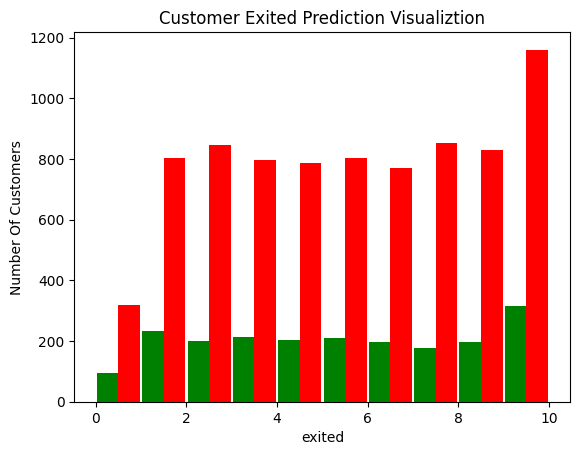

In [582]:
exited_no = df1[df1.Exited==0].Tenure
exited_yes = df1[df1.Exited==1].Tenure

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['green','red'],label=['Exited=0','Exited=1'])
plt.xlabel("exited")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

In [583]:
df1.dtypes

,0
CreditScore,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64


In [584]:
df1.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0


In [585]:
cols_to_scale = ['CreditScore', 'Balance', 'EstimatedSalary','NumOfProducts','Age','Tenure']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [586]:
df1.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
5,0.590,0,0.351351,0.8,0.453394,0.333333,1,0,0.748797,1
6,0.944,0,0.432432,0.7,0.000000,0.333333,1,1,0.050261,0
7,0.052,1,0.148649,0.4,0.458540,1.000000,1,0,0.596733,1
8,0.302,0,0.351351,0.4,0.566170,0.333333,0,1,0.374680,0
9,0.668,0,0.121622,0.2,0.536488,0.000000,1,1,0.358605,0


In [587]:
df1.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [588]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [589]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [590]:
df1.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [591]:
import tensorflow as tf
from tensorflow import keras


In [592]:
df1.shape

(10000, 10)

In [593]:
df1.head(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.0,0.0,1,1,0.506735,1


In [594]:
X = df1[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y = df1['Exited']

In [595]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [596]:
model = keras.Sequential([

              keras.layers.Dense(8, input_shape = (9,),activation="relu"),
              keras.layers.Dense(1,activation="sigmoid")

])

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train,y_train,epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6218 - loss: 0.6327
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7993 - loss: 0.4837
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7953 - loss: 0.4811
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7963 - loss: 0.4701
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8008 - loss: 0.4636
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8070 - loss: 0.4480
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8067 - loss: 0.4532
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8110 - loss: 0.4453
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8109 - loss: 0.4416
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8083 - loss: 0.4408
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8076 - loss: 0.4369
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [597]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8254 - loss: 0.4105


[0.4079844057559967, 0.8295000195503235]

In [598]:

yp = model.predict(X_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.12334076],
       [0.12380759],
       [0.11437945],
       [0.06520553],
       [0.21349984]], dtype=float32)

In [599]:

y_test[:5]


,Exited
7054,0
442,0
3954,0
2288,0
3196,0


In [600]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [601]:

y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [602]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1595
           1       0.68      0.30      0.41       405

    accuracy                           0.83      2000
   macro avg       0.76      0.63      0.66      2000
weighted avg       0.81      0.83      0.80      2000



Text(95.72222222222221, 0.5, 'Truth')

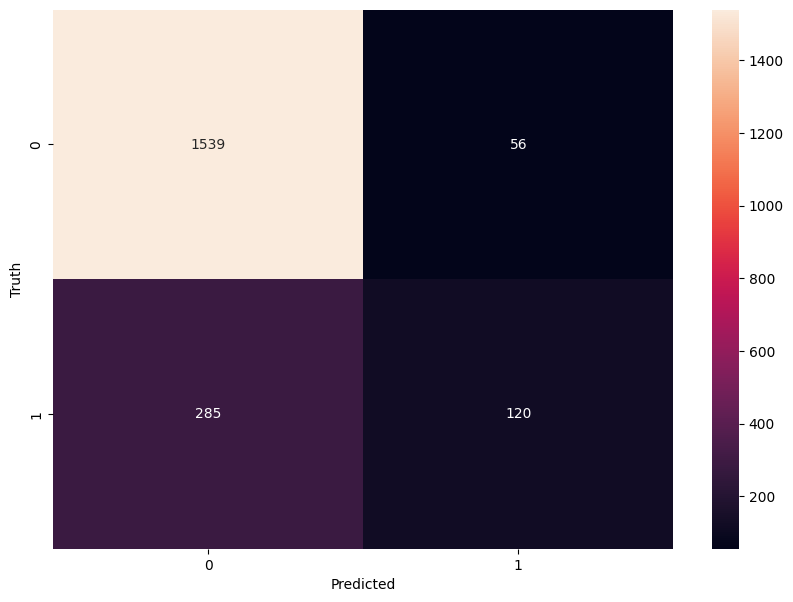

In [603]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [604]:
#Accuracy

In [605]:
round((1554+121)/(1554+121+41+282),2)

0.84

How to handle imbalanced data sets

In [606]:
len(X_train.value_counts())

8000

In [607]:
y_train.value_counts()

,count
Exited,
0,6368
1,1632


In [608]:
y_test.value_counts()

,count
Exited,
0,1595
1,405


In [609]:
from sklearn.utils import resample


In [610]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1


In [611]:
df_majority = df[df1['Exited']==0]
df_minority = df[df1['Exited']==1]

df_downsampled = resample(df_majority ,replace=False,n_samples = len(df_minority),random_state =42)

In [612]:
df_downsampled

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,0.512,0,0.256757,0.8,0.616635,0.333333,1,0,0.445481,0
6409,0.666,1,0.202703,0.9,0.000000,0.333333,1,1,0.193883,0
2157,0.788,1,0.351351,0.3,0.000000,0.333333,1,1,0.945113,0
1618,0.694,0,0.121622,0.8,0.562873,0.333333,1,0,0.452941,0
1633,0.424,0,0.229730,0.7,0.000000,0.000000,0,0,0.244314,0
...,...,...,...,...,...,...,...,...,...,...
9918,0.604,0,0.175676,0.1,0.529548,0.000000,0,0,0.790290,0
7710,0.312,1,0.297297,0.3,0.000000,0.000000,1,1,0.721739,0
5156,0.410,0,0.202703,0.5,0.507550,0.000000,0,1,0.608947,0
3104,0.352,0,0.175676,0.5,0.580065,0.000000,1,0,0.662029,0


In [613]:
df_new = pd.concat([df_downsampled,df_minority],axis=0)

In [614]:
df_new.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,0.512,0,0.256757,0.8,0.616635,0.333333,1,0,0.445481,0
6409,0.666,1,0.202703,0.9,0.000000,0.333333,1,1,0.193883,0
2157,0.788,1,0.351351,0.3,0.000000,0.333333,1,1,0.945113,0
1618,0.694,0,0.121622,0.8,0.562873,0.333333,1,0,0.452941,0
1633,0.424,0,0.229730,0.7,0.000000,0.000000,0,0,0.244314,0


In [615]:
features = df_new[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
target = df_new['Exited']

In [616]:
features.value_counts()

CreditScore  Gender  Age       Tenure  Balance   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary
0.000        0       0.283784  0.0     0.437362  0.333333       0          0               0.618012           1
0.688        0       0.216216  0.5     0.509769  0.000000       1          0               0.508680           1
0.686        0       0.351351  0.5     0.496622  0.333333       1          1               0.234955           1
                     0.364865  0.2     0.464518  0.333333       0          0               0.115655           1
                     0.378378  0.2     0.417554  0.000000       1          1               0.311814           1
                                                                                                             ..
0.516        0       0.256757  0.2     0.519976  0.000000       1          0               0.109788           1
                     0.324324  0.5     0.000000  0.333333       1          0               0.892549           1
                     0.351351  0.7     0.455179  0.000000       1          1               0.389131           1
                     0.364865  0.4     0.000000  0.333333       0          0               0.183447           1
1.000        1       0.702703  0.1     0.386402  0.666667       1          0               0.311387           1
Name: count, Length: 4074, dtype: int64

In [617]:
target.value_counts()

,count
Exited,
0,2037
1,2037


In [618]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.20,random_state=42, stratify=target)

In [619]:
X_train.shape

(3259, 9)

In [620]:
y_train.shape

(3259,)

In [621]:
y_test.value_counts()



,count
Exited,
0,408
1,407


In [622]:
df_new.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,0.512,0,0.256757,0.8,0.616635,0.333333,1,0,0.445481,0
6409,0.666,1,0.202703,0.9,0.000000,0.333333,1,1,0.193883,0
2157,0.788,1,0.351351,0.3,0.000000,0.333333,1,1,0.945113,0


In [623]:
model_new = keras.Sequential([
    keras.layers.Dense(8, input_dim=9, activation = 'relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid')


])

model_new.compile(

    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_new.fit(X_train,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5856 - loss: 0.6875
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6236 - loss: 0.6666
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6688 - loss: 0.6508
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6723 - loss: 0.6361
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6685 - loss: 0.6264
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6806 - loss: 0.6071
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - loss: 0.6071
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6902 - loss: 0.5952
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6949 - loss: 0.5905
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6993 - loss: 0.5789
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6951 - loss: 0.5874
Epoch 12/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [624]:
model.evaluate(X_test,y_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5929 - loss: 0.7636 


[0.726752519607544, 0.6159509420394897]

In [625]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (3259, 9)
Shape of y_train: (3259,)


In [626]:
from sklearn.metrics import confusion_matrix, classification_report

In [627]:
yp_new = model_new.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [628]:
y_new_pred = [] # make sure this list is initialized
for element in yp_new:
  if element > 0.5:
    y_new_pred.append(1) # append to the correct list
  else:
    y_new_pred.append(0)

In [629]:
confusion_matrix(y_test,y_new_pred)

array([[307, 101],
       [ 85, 322]])

In [630]:
print(classification_report(y_test,y_new_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       408
           1       0.76      0.79      0.78       407

    accuracy                           0.77       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.77      0.77      0.77       815



Text(95.72222222222221, 0.5, 'Truth')

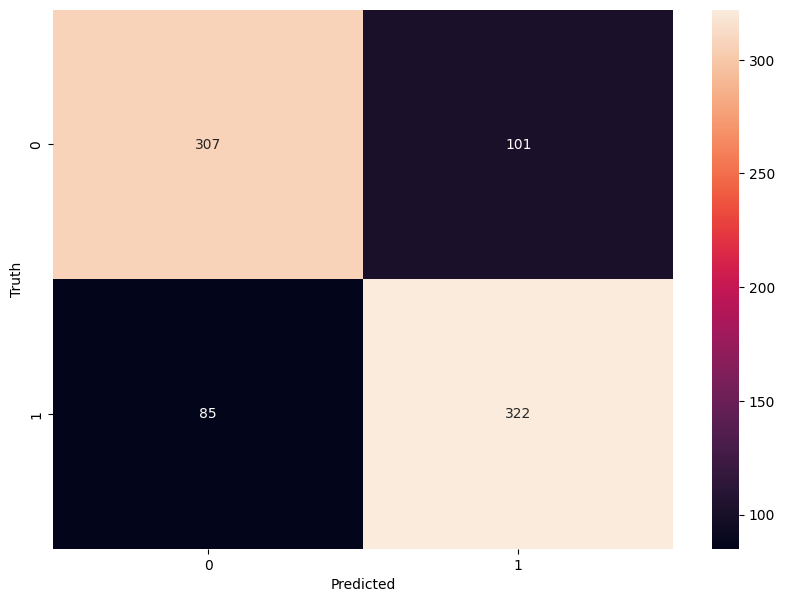

In [631]:
import seaborn as sn
cmm = tf.math.confusion_matrix(labels=y_test,predictions=y_new_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cmm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


upper sampling methods

In [632]:
df_new.head(2

            )

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,0.512,0,0.256757,0.8,0.616635,0.333333,1,0,0.445481,0
6409,0.666,1,0.202703,0.9,0.000000,0.333333,1,1,0.193883,0


In [633]:
df_majority_oversampling = df[df1['Exited']==0]
df_minority_oversampling = df[df1['Exited']==1]

In [634]:
df_majority_oversampling.shape

(7963, 10)

In [635]:
df_minority_oversampling.shape

(2037, 10)

In [636]:
df_minority_upsampled = resample(df_minority_oversampling,replace = True, n_samples = len(df_majority_oversampling),random_state=42)

In [637]:
df_oversampled = pd.concat([df_majority_oversampling, df_minority_upsampled])

In [638]:
df_oversampled.shape

(15926, 10)

In [639]:
from sklearn.model_selection import train_test_split

In [640]:
oversample_x = df_oversampled[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
oversample_y = df_oversampled['Exited']

In [641]:
X_train,X_test,y_train,y_test = train_test_split(oversample_x,oversample_y,test_size=0.2,stratify=oversample_y,random_state=42)

In [642]:
model_oversample = keras.Sequential([
    keras.layers.Dense(8,input_dim=9, activation = 'relu'),
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(4, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model_oversample.compile (
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model_oversample.fit(X_train,y_train,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5404 - loss: 0.7056
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6248 - loss: 0.6420
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6752 - loss: 0.6003
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6918 - loss: 0.5825
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6963 - loss: 0.5803
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6954 - loss: 0.5786
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7006 - loss: 0.5691
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7038 - loss: 0.5684
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7160 - loss: 0.5545
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7094 - loss: 0.5588
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7292 - loss: 0.5393
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [643]:
yp_oversample = model_oversample.predict(X_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [644]:
y_pred_oversample = []
for element in yp_oversample:
  if element > 0.5:
    y_pred_oversample.append(1)
  else:
    y_pred_oversample.append(0)

In [645]:
print(classification_report(y_test,y_pred_oversample))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1593
           1       0.74      0.81      0.77      1593

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.76      0.76      0.76      3186



In [646]:
print(confusion_matrix(y_test,y_pred_oversample))

[[1127  466]
 [ 295 1298]]


Text(95.72222222222221, 0.5, 'Truth')

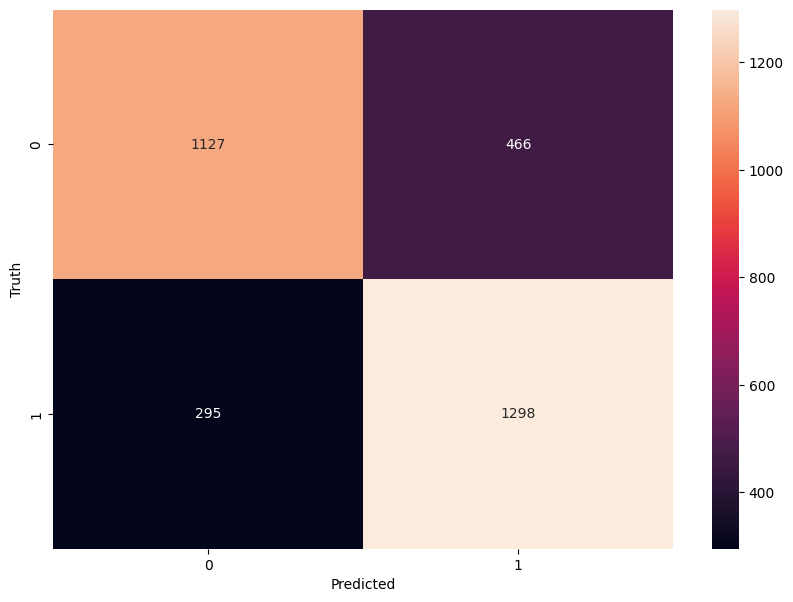

In [647]:
import seaborn as sn
cm_oversample = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_oversample)

plt.figure(figsize = (10,7))
sn.heatmap(cm_oversample, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Trying with Smote

In [648]:
sm_features = df1[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
sm_target = df1['Exited']

In [649]:
df_majority_sm = df[df1['Exited']==0]
df_minority_sm = df[df1['Exited']==1]

In [650]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')

In [651]:
x_sm, y_sm = smote.fit_resample(sm_features,sm_target)

In [652]:
y_sm.value_counts()

,count
Exited,
1,7963
0,7963


In [653]:
sm_target.value_counts(

)

,count
Exited,
0,7963
1,2037


In [654]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size =0.20,random_state=42,stratify = y_sm)

In [655]:
model_smote = keras.Sequential([
    keras.layers.Dense(8, input_dim=9, activation = 'relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid')


])

model_smote.compile(

    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_smote.fit(X_train,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5571 - loss: 0.6888
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6336 - loss: 0.6449
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6614 - loss: 0.6089
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6996 - loss: 0.5606
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7298 - loss: 0.5298
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7390 - loss: 0.5109
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7538 - loss: 0.4960
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7669 - loss: 0.4884
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7617 - loss: 0.4851
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7535 - loss: 0.4905
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7658 - loss: 0.4807
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [656]:
model_smote.evaluate(X_test,y_test
                     )

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7752 - loss: 0.4616


[0.45943987369537354, 0.7730696797370911]

In [657]:
yp_smote = model_smote.predict(X_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [658]:
y_pred_smote = []
for element in yp_smote:
  if element > 0.5:
    y_pred_smote.append(1)
  else:
    y_pred_smote.append(0)

In [659]:
print(classification_report(y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1593
           1       0.76      0.79      0.78      1593

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186



Text(95.72222222222221, 0.5, 'Truth')

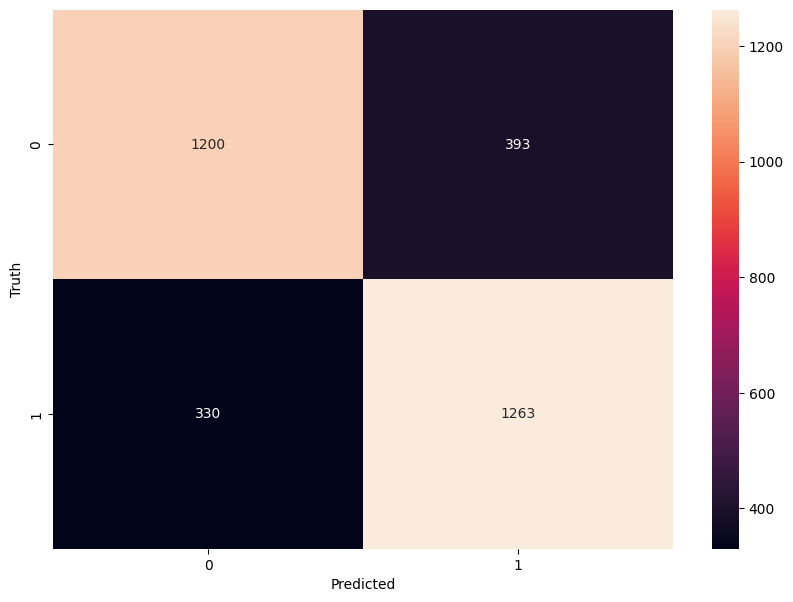

In [660]:
import seaborn as sn
cm_smote = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_smote)

plt.figure(figsize = (10,7))
sn.heatmap(cm_smote, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Ensemble methods

In [661]:
ensemble_features = df1[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
ensemble_target = df1['Exited']

ENSEMBLE PART 1

In [662]:
target_0_major = df[df1['Exited']==0]
target_1_minor = df[df1['Exited']==1]

In [663]:
7963/3



2654.3333333333335

In [664]:
df_combine_ensemble = pd.concat([target_0_major[:2037],target_1_minor],axis=0)
ensemble_x = df1[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
ensemble_y = df1['Exited']


In [665]:
df_combine_ensemble

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
6,0.944,0,0.432432,0.7,0.000000,0.333333,1,1,0.050261,0
8,0.302,0,0.351351,0.4,0.566170,0.333333,0,1,0.374680,0
...,...,...,...,...,...,...,...,...,...,...
9981,0.296,0,0.324324,0.3,0.605982,0.000000,1,1,0.267193,1
9982,0.610,1,0.378378,0.7,0.546617,0.000000,1,0,0.575729,1
9991,0.494,1,0.472973,0.4,0.352259,0.000000,1,0,0.346899,1
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1


In [666]:
X_train,X_test,y_train,y_test= train_test_split(ensemble_x,ensemble_y,test_size=0.20,random_state=42 ,stratify=ensemble_y)


In [667]:
model_ensemble = keras.Sequential([
    keras.layers.Dense(8,input_dim=9, activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])
model_ensemble.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

model_ensemble.fit(X_train,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5404 - loss: 0.6968
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8016 - loss: 0.5005
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8012 - loss: 0.4861
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4772
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8135 - loss: 0.4525
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8213 - loss: 0.4437
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8272 - loss: 0.4386
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8324 - loss: 0.4321
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8265 - loss: 0.4342
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8406 - loss: 0.4129
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8318 - loss: 0.4261
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [668]:
model_ensemble.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8685 - loss: 0.3305


[0.3490220308303833, 0.8569999933242798]

In [669]:
yp_ensemble1 = model_ensemble.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [670]:
y_pred_ensemble1 = []
for element in yp_ensemble1:
  if element > 0.5:
    y_pred_ensemble1.append(1)
  else:
    y_pred_ensemble1.append(0)

In [671]:
print(classification_report(y_test,y_pred_ensemble1))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.45      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

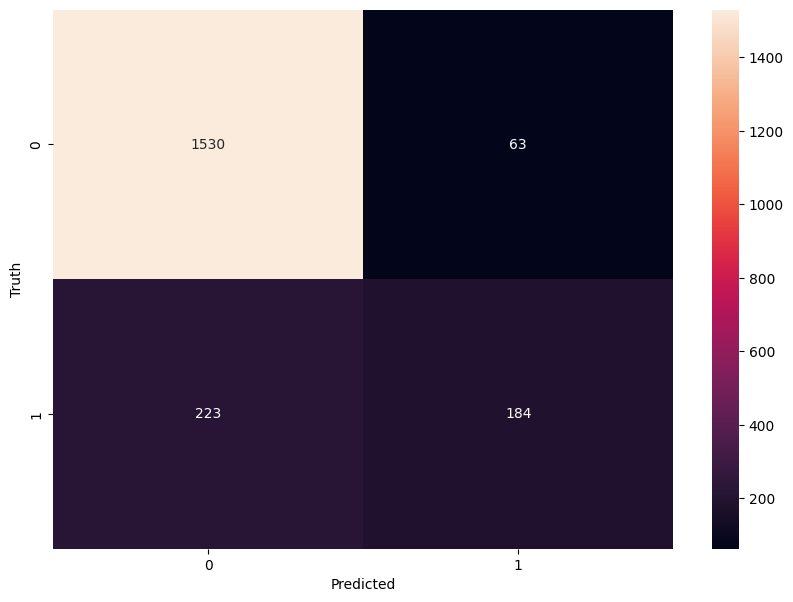

In [672]:
import seaborn as sn
cm_ensemble1 = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_ensemble1)

plt.figure(figsize = (10,7))
sn.heatmap(cm_ensemble1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Ensemble 2

In [673]:
target_0_major2 = df[df1['Exited']==0]
target_1_minor2 = df[df1['Exited']==1]

In [674]:
2037+2037
4074+2037

6111

In [675]:
df_combine_ensemble2 = pd.concat([target_0_major2[2037:4074],target_1_minor2],axis=0)
ensemble2_x = df1[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
ensemble2_y = df1['Exited']

In [676]:
X_train,X_test,y_train,y_test= train_test_split(ensemble2_x,ensemble2_y,test_size=0.20,random_state=42 ,stratify=ensemble_y)


In [677]:
2654+2654

5308

In [678]:
model_ensemble2 = keras.Sequential([
    keras.layers.Dense(8,input_dim=9, activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])
model_ensemble2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

model_ensemble2.fit(X_train,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7944 - loss: 0.6276
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7955 - loss: 0.4854
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7932 - loss: 0.4775
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8011 - loss: 0.4608
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7978 - loss: 0.4578
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8008 - loss: 0.4471
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8058 - loss: 0.4472
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8076 - loss: 0.4368
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8098 - loss: 0.4406
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8130 - loss: 0.4336
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8116 - loss: 0.4353
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [679]:
model_ensemble2.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.3788


[0.40045639872550964, 0.8314999938011169]

In [680]:
yp_ensemble2 = model_ensemble2.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [681]:
y_pred_ensemble2 = []
for element in yp_ensemble2:
  if element > 0.5:
    y_pred_ensemble2.append(1)
  else:
    y_pred_ensemble2.append(0)

In [682]:
print(classification_report(y_test,y_pred_ensemble2))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1593
           1       0.69      0.31      0.43       407

    accuracy                           0.83      2000
   macro avg       0.77      0.64      0.66      2000
weighted avg       0.81      0.83      0.80      2000



Text(95.72222222222221, 0.5, 'Truth')

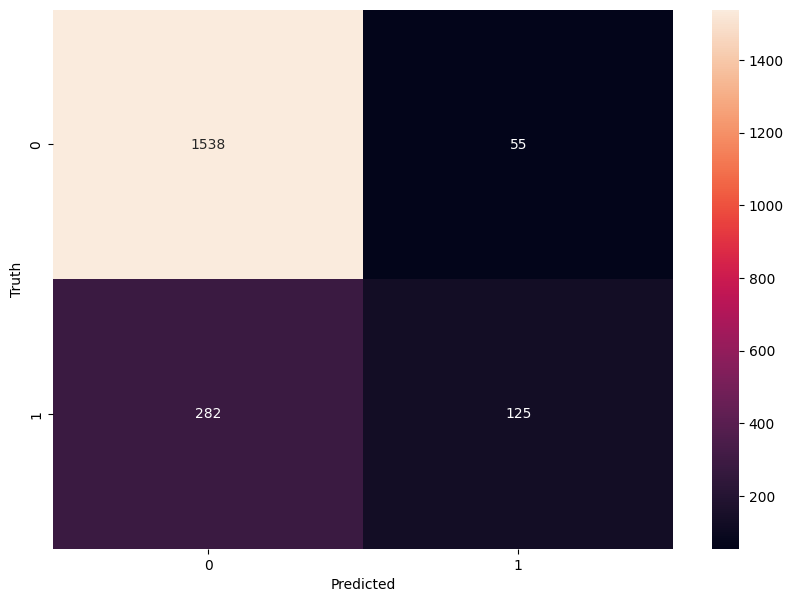

In [683]:
import seaborn as sn
cm_ensemble2 = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_ensemble2)

plt.figure(figsize = (10,7))
sn.heatmap(cm_ensemble2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [684]:
target_0_major3 = df[df1['Exited']==0]
target_1_minor3 = df[df1['Exited']==1]

In [685]:
7963-5308

2655

In [686]:
df_combine_ensemble3 = pd.concat([target_0_major3[4074:6111],target_1_minor3],axis=0)
ensemble_x3= df1[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
ensemble_y3 = df1['Exited']


In [687]:
X_train,X_test,y_train,y_test= train_test_split(ensemble_x3,ensemble_y3,test_size=0.20,random_state=42 ,stratify=ensemble_y)


In [688]:
df_combine_ensemble3.Exited.value_counts()

,count
Exited,
0,2037
1,2037


In [689]:
model_ensemble3 = keras.Sequential([
    keras.layers.Dense(8,input_dim=9, activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])
model_ensemble3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

model_ensemble3.fit(X_train,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7900 - loss: 0.5776
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7996 - loss: 0.4985
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8014 - loss: 0.4812
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7951 - loss: 0.4858
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7928 - loss: 0.4800
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4641
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8019 - loss: 0.4599
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8053 - loss: 0.4536
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8122 - loss: 0.4450
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8176 - loss: 0.4395
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8154 - loss: 0.4365
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [690]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.3754


[0.39956215023994446, 0.8289999961853027]

In [691]:
yp_ensemble3 = model_ensemble3.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [692]:
y_pred_ensemble3 = []
for element in yp_ensemble3:
  if element > 0.5:
    y_pred_ensemble3.append(1)
  else:
    y_pred_ensemble3.append(0)

In [693]:
print(classification_report(y_test,y_pred_ensemble3))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.84      0.37      0.51       407

    accuracy                           0.86      2000
   macro avg       0.85      0.67      0.71      2000
weighted avg       0.85      0.86      0.83      2000



Text(95.72222222222221, 0.5, 'Truth')

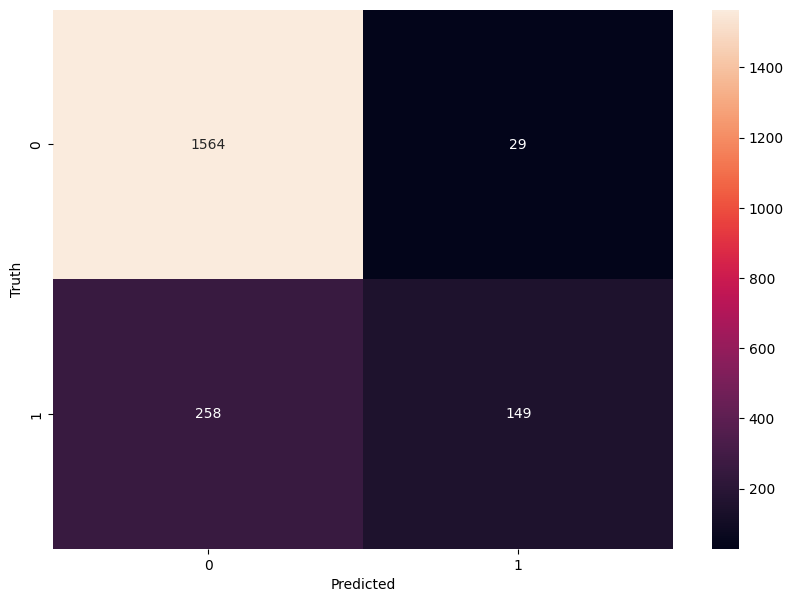

In [694]:
import seaborn as sn
cm_ensemble3 = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_ensemble3)

plt.figure(figsize = (10,7))
sn.heatmap(cm_ensemble3, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [695]:
len(y_pred_ensemble1)

2000

In [696]:
y_pred_final = y_pred_ensemble1.copy()
for i in range(len(y_pred_ensemble1)):
    n_ones = y_pred_ensemble1[i] + y_pred_ensemble2[i] + y_pred_ensemble3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [697]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.81      0.40      0.53       407

    accuracy                           0.86      2000
   macro avg       0.84      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000

